#STOCK PRICE PREDICTION

LIBRARIES NEED TO BE INSTALLED

In [1]:
!pip install tensorflow pandas matplotlib scikit-learn openpyxl

IMPORTING REQUIRED LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

LOADING THE DATASET

In [3]:
file_path = '/content/Minor Project Data set (Stock Price Prediction) (1).xlsx'
df = pd.read_excel(file_path)
print(df.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2 2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3 2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  


PROCESSING THE DATASET

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2018-02-05 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.2 KB


In [6]:
df.describe()
df.shape


(1009, 6)

In [7]:
df.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,False,False,False,False,False,False
2018-02-06,False,False,False,False,False,False
2018-02-07,False,False,False,False,False,False
2018-02-08,False,False,False,False,False,False
2018-02-09,False,False,False,False,False,False
...,...,...,...,...,...,...
2022-01-31,False,False,False,False,False,False
2022-02-01,False,False,False,False,False,False
2022-02-02,False,False,False,False,False,False


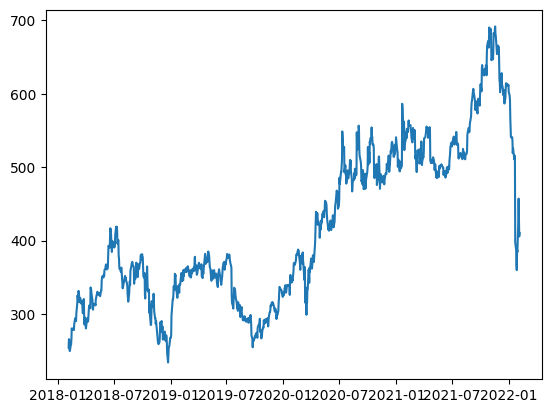

In [8]:
plt.plot(df.Close)
plt.show()

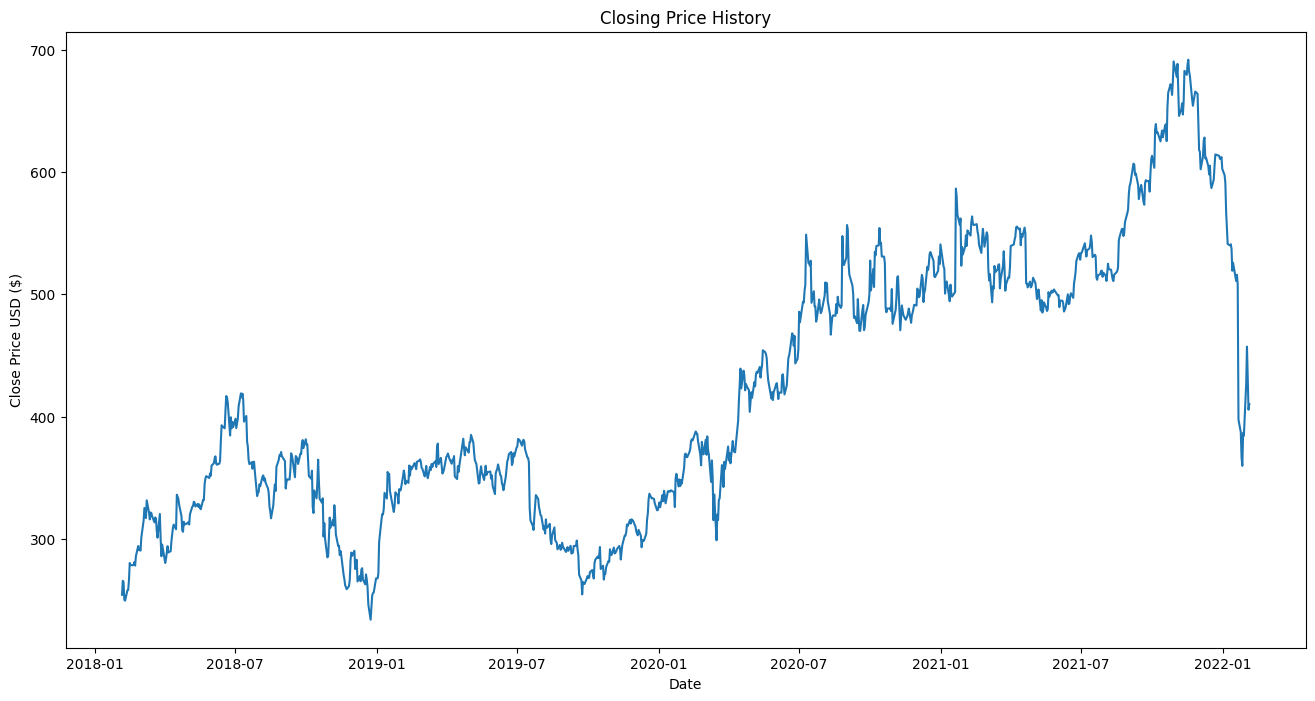

In [9]:
plt.figure(figsize=(16, 8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

<Axes: >

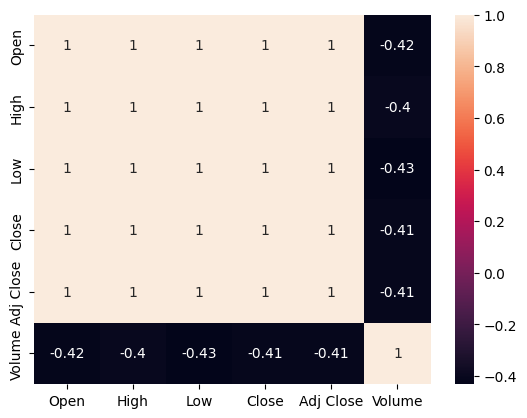

In [10]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True)

Remaining features after PCA and dropping original columns:
Index(['Adj Close', 'Volume', 'PCA1', 'PCA2'], dtype='object')
Remaining features after dropping highly correlated columns:
Index(['Open', 'Volume'], dtype='object')

Correlation matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998605  0.998508  0.996812   0.996812 -0.415838
High       0.998605  1.000000  0.998203  0.998551   0.998551 -0.400699
Low        0.998508  0.998203  1.000000  0.998544   0.998544 -0.432116
Close      0.996812  0.998551  0.998544  1.000000   1.000000 -0.413362
Adj Close  0.996812  0.998551  0.998544  1.000000   1.000000 -0.413362
Volume    -0.415838 -0.400699 -0.432116 -0.413362  -0.413362  1.000000


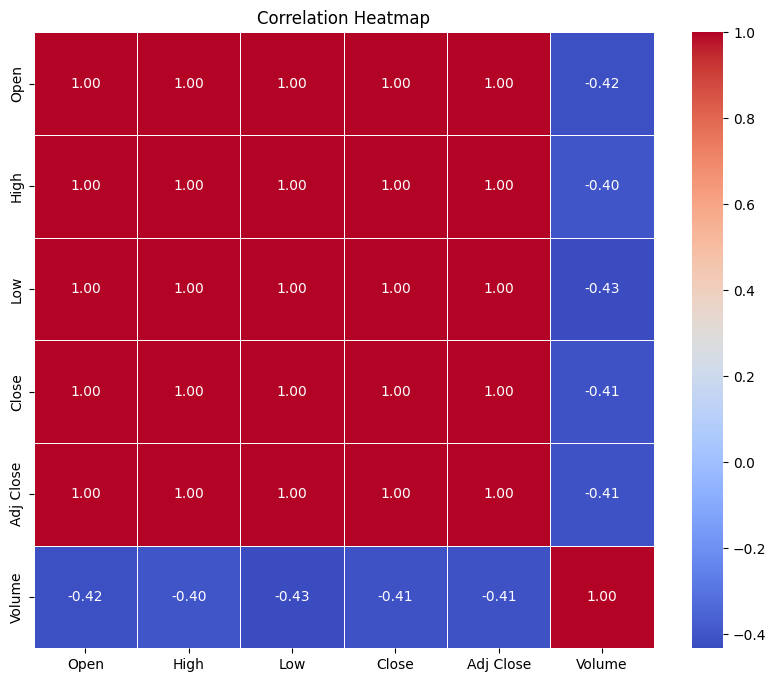


Explained variance ratio by each component:
[0.86640624 0.13257086]

Shape of the reduced data:
(1009, 2)

First few rows of the reduced data:
        PC1       PC2
0 -3.421305  0.055546
1 -3.439284  0.184112
2 -3.128246 -0.427581
3 -3.333352 -0.410544
4 -3.795705  0.912483


In [11]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features_to_scale = ['Open', 'High', 'Low', 'Close']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features_to_scale])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
data_pca = df.copy()
data_pca['PCA1'] = pca_df['PCA1']
data_pca['PCA2'] = pca_df['PCA2']
df_pca_reduced = data_pca.drop(['Open', 'High', 'Low', 'Close'], axis=1)
print("Remaining features after PCA and dropping original columns:")
print(df_pca_reduced.columns)
data = df.copy()
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_corr_reduced = df.drop(to_drop, axis=1)
print("Remaining features after dropping highly correlated columns:")
print(df_corr_reduced.columns)
correlation_matrix = df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(scaled_data)
print("\nExplained variance ratio by each component:")
print(pca.explained_variance_ratio_)
print("\nShape of the reduced data:")
print(reduced_data.shape)
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])
print("\nFirst few rows of the reduced data:")
print(reduced_df.head())


PREPARING THE DATA FOR **LSTM** MODEL

In [12]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = int(np.ceil(len(dataset) * .95))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

BUILDING THE LSTM MODEL

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


COMPILE THE MODEL

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

TRAIN THE MODEL

In [15]:
model.fit(x_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 58s 51ms/step - loss: 0.0090
Epoch 2/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - loss: 0.0026
Epoch 3/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - loss: 0.0019
Epoch 4/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - loss: 0.0013
Epoch 5/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - loss: 0.0012
Epoch 6/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - loss: 0.0011
Epoch 7/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - loss: 9.4570e-04
Epoch 8/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - loss: 8.8590e-04
Epoch 9/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - loss: 8.0570e-04
Epoch 10/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - loss: 9.6350e-04
Epoch 11/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - loss: 0.0010
Epoch 12/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 43s 45ms/step - loss: 7.8774e-04
Epoch 13/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - loss: 8.1906e-04
Epoch 14/50
899/899 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - loss: 0.0010
Epoch

PREPARING THE TESTING DATASET

In [16]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,305 (610.57 KB)

 Trainable params: 52,101 (203.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,204 (407.05 KB)

MAKING PREDICTIONS

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 489ms/step


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE:', rmse)
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
r2 = r2_score(y_test, predictions)
print('R-squared:', r2)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 328482.7812 
Test Accuracy: 308913.09375
RMSE: 20.810269625917858
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 328482.7812
Test Loss: 308913.09375
R-squared: 0.9440546600144276


In [20]:
model.save('stock_model.h5')

VISUALIZE THE PREDICTIONS

<ipython-input-21-c243f08abaca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


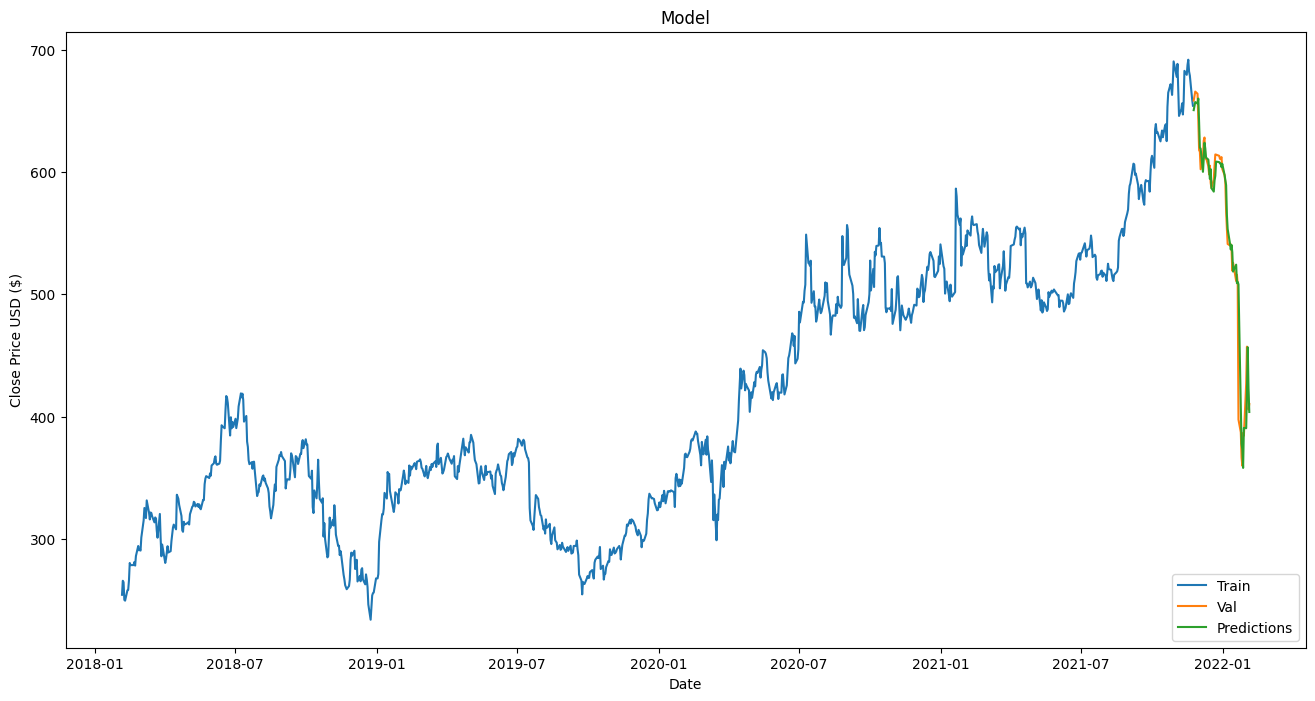

                 Close  Predictions
Date                               
2021-11-24  658.289978   650.474792
2021-11-26  665.640015   657.051758
2021-11-29  663.840027   655.919800
2021-11-30  641.900024   659.926270
2021-12-01  617.770020   640.397705
2021-12-02  616.469971   619.791321
2021-12-03  602.130005   619.012573
2021-12-06  612.690002   600.032227
2021-12-07  625.580017   610.722961
2021-12-08  628.080017   623.804810
2021-12-09  611.000000   619.235168
2021-12-10  611.659973   611.604309
2021-12-13  604.559998   610.018921
2021-12-14  597.989990   601.281494
2021-12-15  605.039978   594.206482
2021-12-16  591.059998   602.202820
2021-12-17  586.729980   586.702637
2021-12-20  593.739990   583.854736
2021-12-21  604.919983   592.998535
2021-12-22  614.239990   596.744080
2021-12-23  614.090027   608.412964
2021-12-27  613.119995   607.982849
2021-12-28  610.710022   606.938477
2021-12-29  610.539978   606.903748
2021-12-30  612.090027   603.823120
2021-12-31  602.440002   606

In [21]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

print(valid)

In [28]:
import gradio as gr
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

model = tf.keras.models.load_model('stock_model.h5')
model.compile(optimizer='adam', loss='mean_squared_error')
scaler = MinMaxScaler(feature_range=(0, 1))

def predict_price(past_60_days):
  past_60_days = np.array(past_60_days).reshape(-1, 1)
  scaled_data = scaler.fit_transform(past_60_days)
  x_test = np.reshape(scaled_data, (1, 60, 1))
  prediction = model.predict(x_test)
  prediction = scaler.inverse_transform(prediction)
  return prediction[0][0]

iface = gr.Interface(
    fn=predict_price,
    inputs=gr.Textbox(lines=60, placeholder="Enter 60 days of closing prices (comma-separated)"),
    outputs="number",
    title="Stock Price Prediction",
    description="Enter 60 days of closing prices to predict the next day's closing price."
)

iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3e7eba781383d319d6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
